## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [18]:
#GETTING FAMILIAR WITH DATA#

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [11,7]
df_office = pd.read_csv("datasets/office_episodes.csv")
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)

    print("##################### Types #####################")
    print(dataframe.dtypes)

    print("##################### Head #####################")
    print(dataframe.head(head))

    print("##################### Tail #####################")
    print(dataframe.tail(head))

    print("##################### NA #####################")
    print(dataframe.isnull().sum())

    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df_office)




##################### Shape #####################
(188, 14)
##################### Types #####################
episode_number      int64
season              int64
episode_title      object
description        object
ratings           float64
votes               int64
viewership_mil    float64
duration            int64
release_date       object
guest_stars        object
director           object
writers            object
has_guests           bool
scaled_ratings    float64
dtype: object
##################### Head #####################
   episode_number  season  episode_title  \
0               0       1          Pilot   
1               1       1  Diversity Day   
2               2       1    Health Care   
3               3       1   The Alliance   
4               4       1     Basketball   

                                         description  ratings  votes  \
0  The premiere episode introduces the boss and s...      7.5   4936   
1  Michael's off color remark puts a sensitivity ...  

In [20]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """


    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df_office)

Observations: 188
Variables: 14
cat_cols: 2
num_cols: 6
cat_but_car: 6
num_but_cat: 2


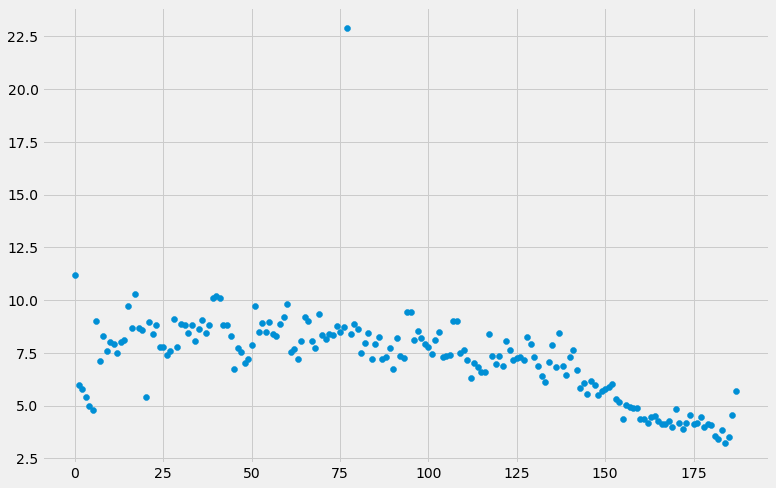

In [21]:
fig = plt.figure()
plt.scatter(x=df_office["episode_number"],y= df_office["viewership_mil"])
plt.show()

In [22]:
cols = []

for ind,row in df_office.iterrows():
    if row["scaled_ratings"] < 0.25:
        cols.append("red")
    elif row["scaled_ratings"] < 0.50:
        cols.append("orange")
    elif row["scaled_ratings"] < 0.75:
        cols.append("lightgreen")
    else:
        cols.append("darkgreen")
cols

['orange',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'darkgreen',
 'orange',
 'lightgreen',
 'orange',
 'orange',
 'orange',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'darkgreen',
 'darkgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'orange',
 'lightgreen',
 'darkgreen',
 'orange',
 'lightgreen',
 'lightgreen',
 'orange',
 'darkgreen',
 'lightgreen',
 'lightgreen',
 'orange',
 'orange',
 'orange',
 'lightgreen',
 'orange',
 'lightgreen',
 'lightgr

In [23]:
sizes = []

for ind,row in df_office.iterrows():
    if row["has_guests"] == False:
        sizes.append(25)
    else:
        sizes.append(250)

sizes



[25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 250,
 250,
 25,
 25,
 250,
 25,
 250,
 25,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 250,
 250,
 25,
 25,
 25,
 250,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 250,
 25,
 25,
 250,
 25,
 250]

In [24]:
df_office["colours"] =  cols 
df_office["sizes"] = sizes
df_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   episode_number  188 non-null    int64  
 1   season          188 non-null    int64  
 2   episode_title   188 non-null    object 
 3   description     188 non-null    object 
 4   ratings         188 non-null    float64
 5   votes           188 non-null    int64  
 6   viewership_mil  188 non-null    float64
 7   duration        188 non-null    int64  
 8   release_date    188 non-null    object 
 9   guest_stars     29 non-null     object 
 10  director        188 non-null    object 
 11  writers         188 non-null    object 
 12  has_guests      188 non-null    bool   
 13  scaled_ratings  188 non-null    float64
 14  colours         188 non-null    object 
 15  sizes           188 non-null    int64  
dtypes: bool(1), float64(3), int64(5), object(7)
memory usage: 22.3+ KB


In [25]:
non_guest_df = df_office[df_office["has_guests"] == False]
guest_df = df_office[df_office["has_guests"] == True]



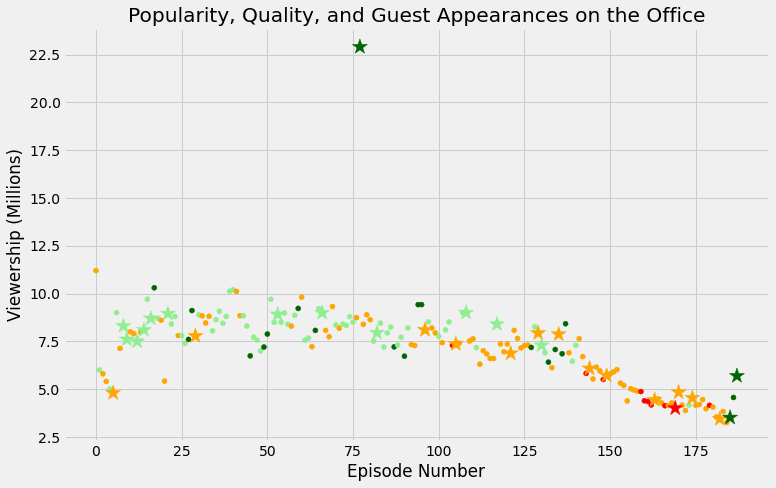

In [26]:
fig = plt.figure()
plt.style.use("fivethirtyeight")
plt.scatter(x=non_guest_df["episode_number"],
            y= non_guest_df["viewership_mil"],
            c=non_guest_df["colours"],
            s=non_guest_df["sizes"]
           )

plt.scatter(x= guest_df["episode_number"],
            y= guest_df["viewership_mil"],
            c= guest_df["colours"],
            s= guest_df["sizes"],
            marker = "*"
           )

plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")       

plt.show()


In [33]:
df_office[df_office['viewership_mil']== df_office['viewership_mil'].max()]["guest_stars"]


77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object

In [34]:
top_star = 'Jessica Alba'